# 第六章 使用scikit-learn构建模型

## 1.使用sklearn处理wine、winequality数据集

### （1）读取数据集

In [1]:
import pandas as pd
import numpy as np

w = pd.read_csv('wine.csv')
wq_raw = pd.read_csv('winequality.csv')

wq_col = np.array([i.replace('\"',"") for i in wq_raw.columns.tolist()[0].split(';')])
wq = np.array([eval(j) for j in wq_raw.values[0][0].split(';')])
for i in wq_raw.index.tolist()[1:]:
    wq = np.vstack((wq,np.array([eval(j) for j in wq_raw.values[i][0].split(';')])))
wq = pd.DataFrame(wq,columns = wq_col.tolist())

### （2）拆分两个数据集的数据和标签

In [27]:
wt = w['Class']
wd = w.iloc[:,1:]

wqt = wq['quality']
wqd = wq.iloc[:,:-1]

wt

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
148    3
149    3
150    3
151    3
152    3
153    3
154    3
155    3
156    3
157    3
158    3
159    3
160    3
161    3
162    3
163    3
164    3
165    3
166    3
167    3
168    3
169    3
170    3
171    3
172    3
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 178, dtype: int64

### （3）将wine_quality数据集划分为训练集、测试集

In [3]:
from sklearn.model_selection import train_test_split

wt_train,wt_test,wd_train,wd_test = train_test_split(wt,wd,test_size = 0.25)
wqt_train,wqt_test,wqd_train,wqd_test = train_test_split(wqt,wqd,test_size = 0.25)

print(wqt_train.shape)

(1199,)


### （4）标准化两个数据集

In [7]:
from sklearn.preprocessing import MinMaxScaler
'''
#生成规则 
Scaler_rule_w =  MinMaxScaler().fit(w) 
Scaler_rule_wq = MinMaxScaler().fit(wq) 


w_Scaler = Scaler_rule_w.transform(w)
wq_Scaler = Scaler_rule_wq.transform(wq) 
'''


w_Scale = MinMaxScaler().fit_transform(w)
wq_Scale = MinMaxScaler().fit_transform(wq)

### （5）对两个数据集进行PCA降维

In [8]:
from sklearn.decomposition import PCA
w_pca_model = PCA(n_components=0.95).fit(w_Scale) #保留95%数据的模型
wq_pca_model = PCA(n_components=0.95).fit(wq_Scale)

w_PCA = w_pca_model.transform(w_Scale)
wq_PCA = wq_pca_model.transform(wq_Scale)

In [9]:
print(w_PCA.shape)
w.shape

(178, 10)


(178, 14)

## 2.构建基于wine数据集的K-Means 聚类模型

### （1）根据上一题处理结果，构建聚类数目为3的K-Means模型

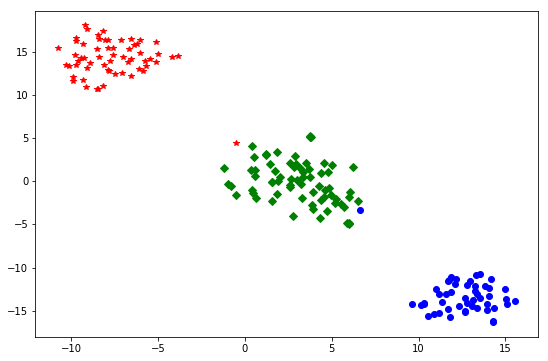

In [56]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# train model
kmeans = KMeans(n_clusters = 3).fit(w_Scale)

# TSNE进行降维
tsne = TSNE(n_components = 2,init = 'random').fit(w_Scale)
df = pd.DataFrame(tsne.embedding_)
df['labels'] = kmeans.labels_
# 提取标签
df1 = df[df['labels']==0]
df2 = df[df['labels']==1]
df3 = df[df['labels']==2]

fig = plt.figure(figsize=(9,6))
plt.plot(df1[0],df1[1],'bo',df2[0],df2[1],'r*',df3[0],df3[1],'gD')
plt.savefig('cluster_test')
plt.show()


### （2）对比真实标签和聚类标签求取FMI

In [57]:
from sklearn.metrics import fowlkes_mallows_score
for i in range(2,7):
    #构建并训练模型
    kmeans = KMeans(n_clusters = i).fit(w_Scale)
    score = fowlkes_mallows_score(wt,kmeans.labels_)
    print(i,score)

2 0.6622879625433716
3 0.976831868106378
4 0.8736909280266123
5 0.8293543875963968
6 0.7733347150604685


### （3）在聚类数目为2-10类时，确定最优聚类数目

In [59]:
best = -1;
init_score = 0;
for i in range(2,11):
    #构建并训练模型
    kmeans = KMeans(n_clusters = i).fit(w_Scale)
    score = fowlkes_mallows_score(wt,kmeans.labels_)
    print(i,score)

2 0.658535388164797
3 0.976831868106378
4 0.874979875264973
5 0.8250401260646838
6 0.8032544528884163
7 0.6534023535405435
8 0.6528271753009521
9 0.5894769676730209
10 0.6017758078502798


### （4）求取模型的轮廓系数，绘制轮廓系数折线图，确定最优聚类数目

### （5）求取Calinski-Harabasz指数，确定最优聚类数目

## 3.构建基于wine数据集的SVM分类模型

### （1）读取wine数据集，区分标签和数据

### （2）将wine数据集划分为训练集和测试集

### （3）使用离差标准化方法标准化wine数据集

### （4）构建SVM模型，预测测试集结果

### （5）打印分类报告，评价分类模型性能

## 4.构建基于wine_quality数据集的回归模型

### （1）根据wine_quality数据集数据集处理结果，构建线性回归模型

### （2）根据wine_quality数据集数据集处理结果，构建梯度提升回归模型

### （3）结合真实评分和预测评分，计算均方误差，中值绝对误差，可解释方差值

### （4）根据得分，判定模型的性能优劣